In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
train_df=pd.read_excel('/content/Data_Train.xlsx')

##Train

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 30m      1
19h 50m      1
30h 10m      1
29h 40m      1
42h 45m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_df.dropna(inplace=True)

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##EDA

we have to convert Date of journey to datetime dtype 

In [8]:
#extract day of journey and month of journery
train_df['Journey_day']=pd.to_datetime(train_df['Date_of_Journey'],format='%d/%m/%Y').dt.day

train_df['Journey_month']=pd.to_datetime(train_df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [9]:
train_df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [10]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
#extract departure hour and min

train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour

train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

train_df.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [12]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [13]:
#extract arrival hour and min

train_df['Arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour

train_df['Arrival_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute

train_df.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [14]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [15]:
#duration is the time taken to reah destination is duration
# Diff btw departure time and arriaval time
duration=list(train_df.Duration)

for i in range(len(duration)):
  if len(duration[i].split()) !=2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip()+' 0m'
    else:
      duration[i]='0h '+duration[i]


In [16]:
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
  duration_hour.append(int(duration[i].split(sep='h')[0]))
  duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [17]:
train_df['duration_hour']=duration_hour
train_df['duration_min']=duration_min

train_df.drop(columns=['Duration'],axis=1,inplace=True)

In [18]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


##Handling categorical data

In [19]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

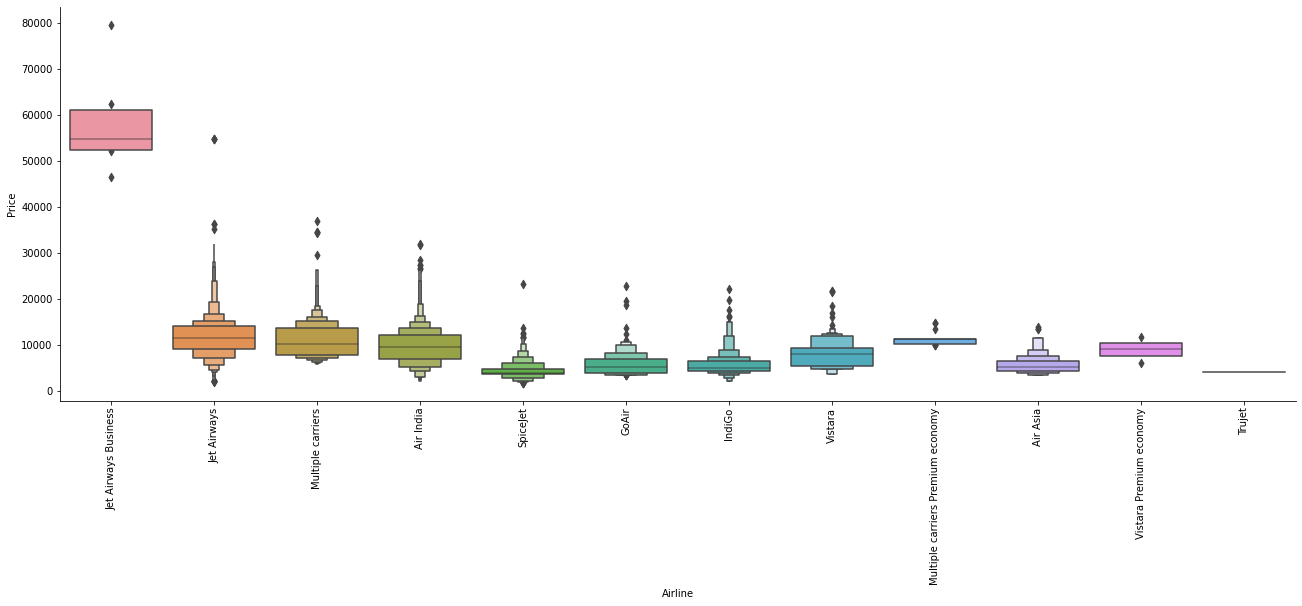

In [20]:
#airline vs price
sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=90)
plt.show()

In [21]:
#as airlines are nominal categories we will perform one hot encoding
Airline=train_df['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
train_df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

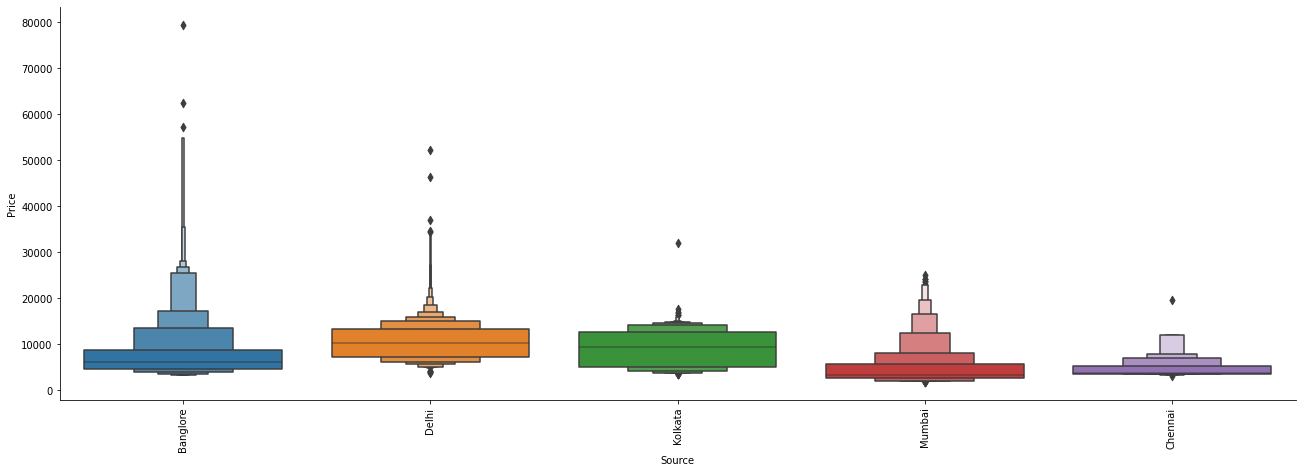

In [23]:
#source vs price
sns.catplot(y='Price',x='Source',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=90)
plt.show()

In [24]:
Source=train_df['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
train_df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
Destination=train_df['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
train_df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [28]:
#we can drop this as total stops and route are related to each other
train_df.drop(columns=['Route'],axis=1,inplace=True)

In [29]:
train_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
#thsi is the case of ordinal category
#here keys are assigned wrt its keys

train_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [31]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


In [32]:
train_df2=pd.concat([train_df,Airline,Source,Destination],axis=1)

In [33]:
train_df2.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
train_df2.drop(columns=['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [35]:
train_df2.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
train_df2.shape

(10682, 30)

##Test

In [37]:
test_df=pd.read_excel('/content/Test_set.xlsx') 

In [38]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
#extract day of journey and month of journery
test_df['Journey_day']=pd.to_datetime(test_df['Date_of_Journey'],format='%d/%m/%Y').dt.day

test_df['Journey_month']=pd.to_datetime(test_df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [40]:
test_df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [41]:
#extract departure hour and min

test_df['Dep_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

test_df['Dep_min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [42]:
#extract arrival hour and min

test_df['Arrival_hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

test_df['Arrival_min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

test_df.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [43]:
#duration is the time taken to reah destination is duration
# Diff btw departure time and arriaval time
duration=list(test_df.Duration)

for i in range(len(duration)):
  if len(duration[i].split()) !=2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip()+' 0m'
    else:
      duration[i]='0h '+duration[i]


In [44]:
test_duration_hour=[]
test_duration_min=[]

for i in range(len(duration)):
  test_duration_hour.append(int(duration[i].split(sep='h')[0]))
  test_duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [45]:
test_df['duration_hour']=test_duration_hour
test_df['duration_min']=test_duration_min

test_df.drop(columns=['Duration'],axis=1,inplace=True)

In [46]:
#as airlines are nominal categories we will perform one hot encoding
Airline=test_df['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [47]:
Source=test_df['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [48]:
Destination=test_df['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [49]:
#we can drop this as total stops and route are related to each other
test_df.drop(columns=['Route'],axis=1,inplace=True)

In [50]:
#thsi is the case of ordinal category
#here keys are assigned wrt its keys

test_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [51]:
test_df2=pd.concat([test_df,Airline,Source,Destination],axis=1)

In [52]:
test_df2.drop(columns=['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [53]:
test_df2.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Feature Selection

Findinf out best features which will contribute ab=nd have good relation with the target variable

Following are the feature selection preocess


1. heatmap

2.feature_importance_

3.Selectkbest

In [54]:
train_df2.shape

(10682, 30)

In [55]:
train_df2.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hour',
       'duration_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [56]:
X=train_df2.drop(columns=['Price'],axis=1)

In [57]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
y=train_df2.Price

In [59]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

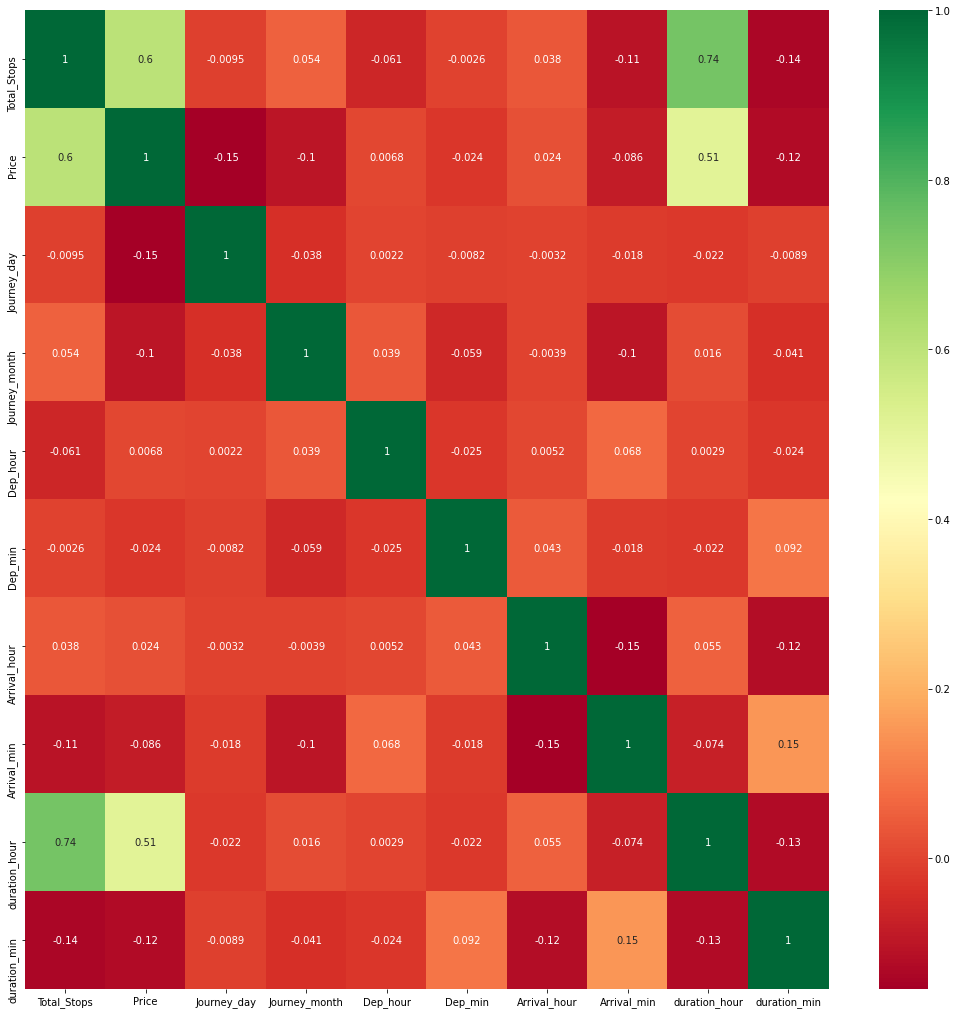

In [60]:
#coorilation between indepenent and dependent features
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [61]:
#extratree regressor
from sklearn.ensemble import ExtraTreesRegressor

selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [62]:
print(selection.feature_importances_)

[2.20625261e-01 1.45048528e-01 5.19505693e-02 2.36084468e-02
 2.15283073e-02 2.74097808e-02 1.86410151e-02 1.51982572e-01
 1.82651124e-02 9.73057825e-03 2.02767987e-03 1.80416907e-02
 1.24230729e-01 6.75029737e-02 2.00458259e-02 8.19198038e-04
 3.34304475e-03 1.13727804e-04 4.88632295e-03 8.24648486e-05
 5.14381716e-04 9.29807998e-03 3.25185579e-03 6.87320237e-03
 7.10850821e-03 1.14354181e-02 5.96679520e-03 4.66704066e-04
 2.52012255e-02]


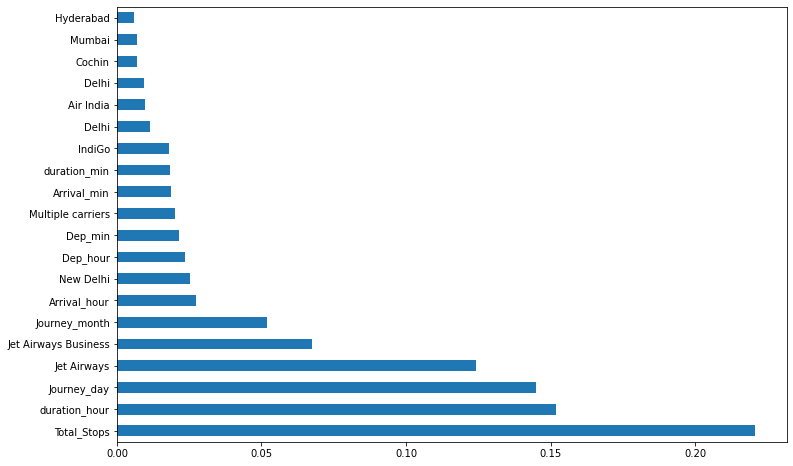

In [63]:
#plotting the important feature
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred=rf.predict(x_test)

In [67]:
rf.score(x_train,y_train)

0.9525761899863504

In [68]:
rf.score(x_test,y_test)

0.7972886724340457

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


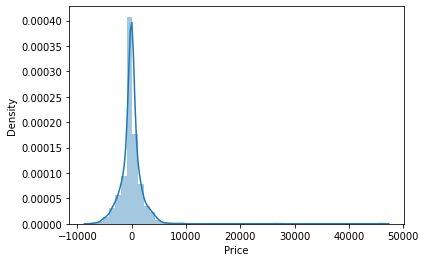

In [69]:
sns.distplot(y_test-y_pred)
plt.show()

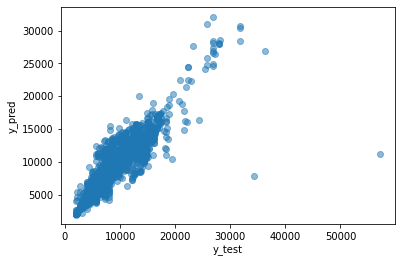

In [70]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [71]:
from sklearn import metrics

In [72]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1178.7443474088955
MSE 4370873.062522717
RMSE 2090.66330682937


Hyperparameter Tuning



Choose following method for hyperparameter tuning


RandomizedSearchCV 


GridSearchCV




In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [83]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [86]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [88]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [89]:
prediction=rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


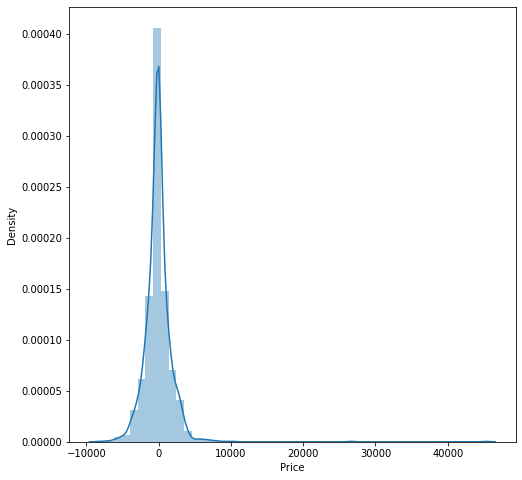

In [93]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

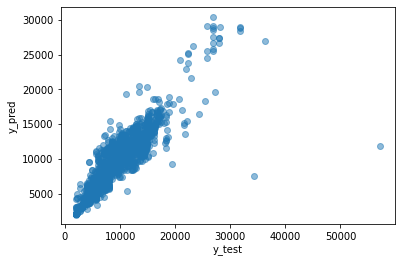

In [94]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [95]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1166.8587891002226
MSE 4062971.782860067
RMSE 2015.6814686006485



#Save the model to reuse it again

In [102]:

import pickle
# open a file, where you ant to store the data
file = open('rf_random.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [103]:
model = open('rf_random.pkl','rb')
forest = pickle.load(model)

In [104]:
y_prediction = forest.predict(x_test)

In [105]:
metrics.r2_score(y_test,y_prediction)

0.8115684458950594